In [24]:
!pip install -q japanize_matplotlib

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import japanize_matplotlib

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
plt.style.use('bmh')

plt.rcParams['figure.figsize'] = 10, 10

In [26]:
# データの読み込み
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AI・データサイエンス実践プログラム/多変量解析/academic_ability.csv')
df.head(3)


,現代文,古文,数学,化学,生物,物理,歴史,世界史,政治経済,英語
0,2,3,4,3,3,4,3,2,3,2
1,5,4,3,3,3,2,4,3,4,5
2,3,3,3,4,3,4,3,4,4,3


In [27]:
type(df)

pandas.core.frame.DataFrame

In [28]:
# DataFrame -> ndarray
x = df.values

In [29]:
type(x)

numpy.ndarray

In [30]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4, random_state = 0)

In [31]:
kmeans.fit(x)

KMeans(n_clusters=4, random_state=0)

In [32]:
# クラスタリングの結果cluster =
cluster = kmeans.labels_

In [33]:
df['cluster'] = cluster

In [34]:
groups = df.groupby('cluster')

In [35]:
groups.size()

cluster
0     6
1    12
2    18
3     4
dtype: int64

In [36]:
groups.agg(['min', 'max', 'mean', 'median'])

現代文                       古文                       数学      ...  \
        min max      mean median min max      mean median min max  ...   
cluster                                                            ...   
0         5   5  5.000000    5.0   5   5  5.000000    5.0   4   5  ...   
1         2   5  3.916667    4.0   2   5  3.833333    4.0   2   3  ...   
2         1   4  3.000000    3.0   1   4  3.000000    3.0   3   5  ...   
3         1   3  1.750000    1.5   1   2  1.500000    1.5   1   2  ...   

              世界史        政治経済                       英語                       
             mean median  min max      mean median min max      mean median  
cluster                                                                      
0        4.666667    5.0    3   5  4.666667    5.0   4   5  4.833333    5.0  
1        3.916667    4.0    3   5  3.833333    4.0   3   5  4.416667    5.0  
2        3.111111    3.0    1   5  3.277778    3.0   1   5  2.944444    3.0  
3        2.000000    2.0    1   3  2.250000    2.5   1   2  1.500000    1.5  

[4 rows x 40 columns]

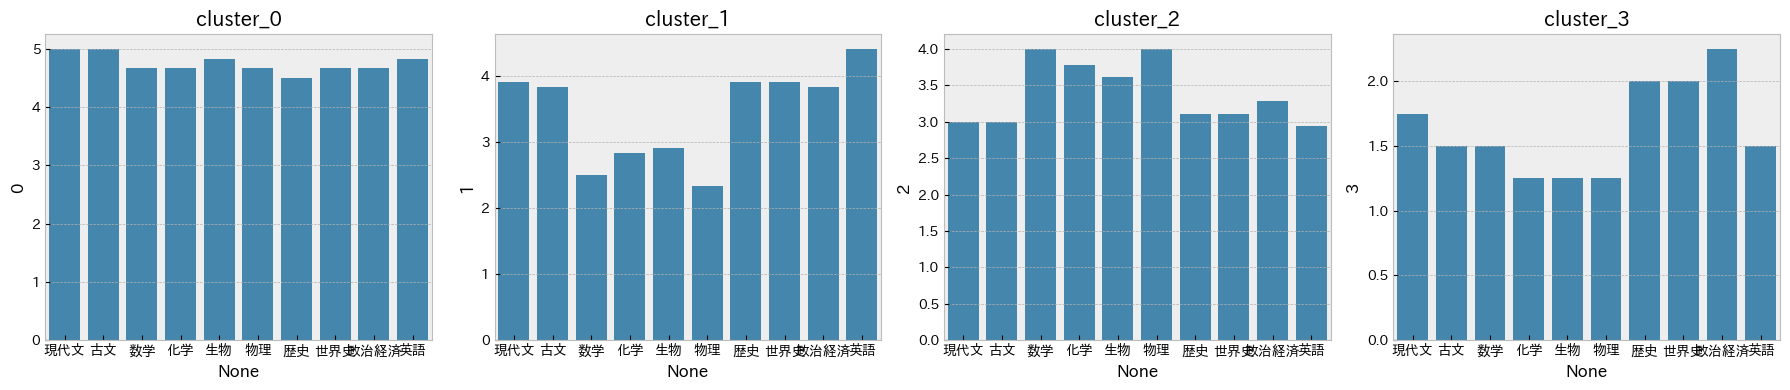

In [39]:
mean = groups.mean()
plt.figure(figsize=(18, 4))
num = kmeans.n_clusters
for n in range(num):
  plt.subplot(1, num, n+1)
  plt.title(f'cluster_{n}')
  sns.barplot(x = mean.columns, y = mean.loc[n])
  plt.tight_layout()

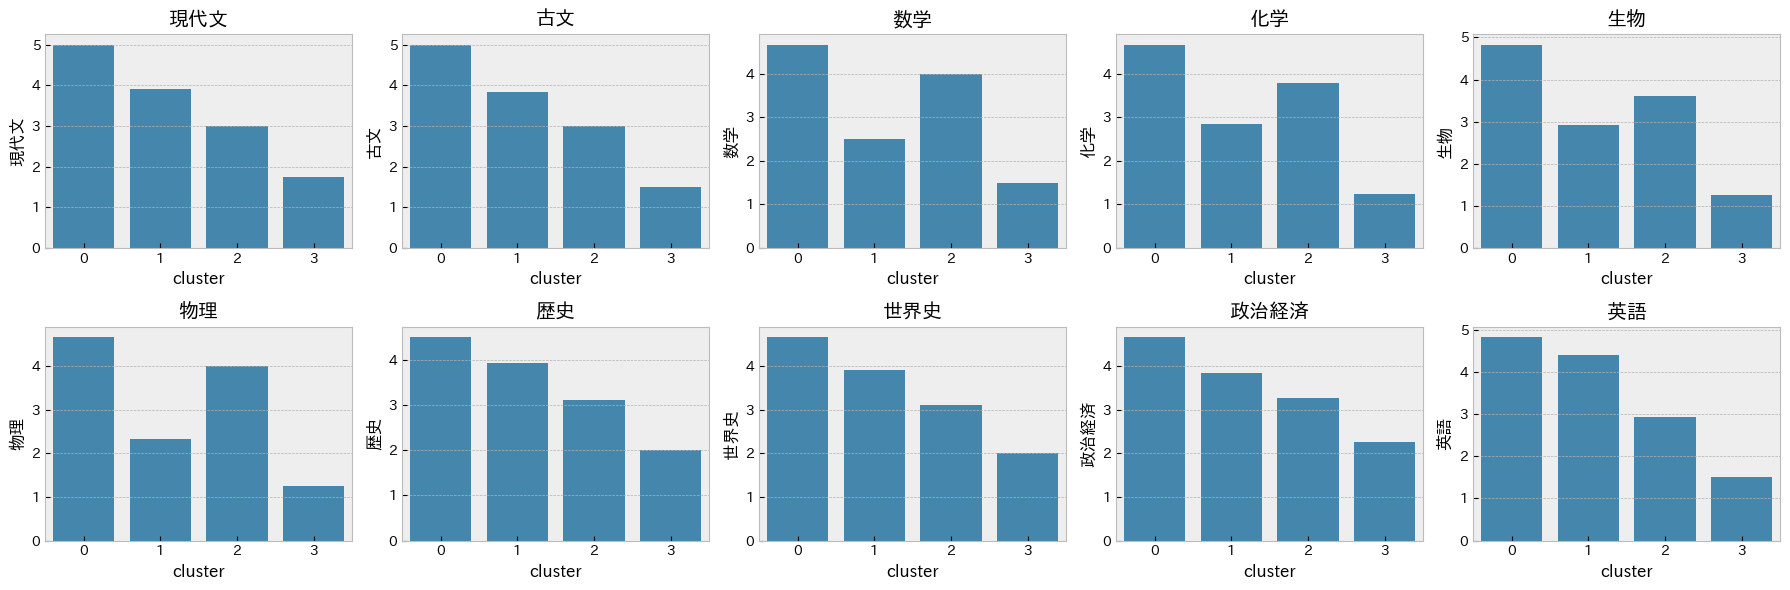

In [40]:
# 各科目ごとに可視化して確認
plt.figure(figsize=(18, 6))

for n, col in enumerate(mean.columns):
    plt.subplot(2, 5, n+1)
    plt.title(f'{col}')
    sns.barplot(x=mean.index, y=mean[col])
    plt.tight_layout()

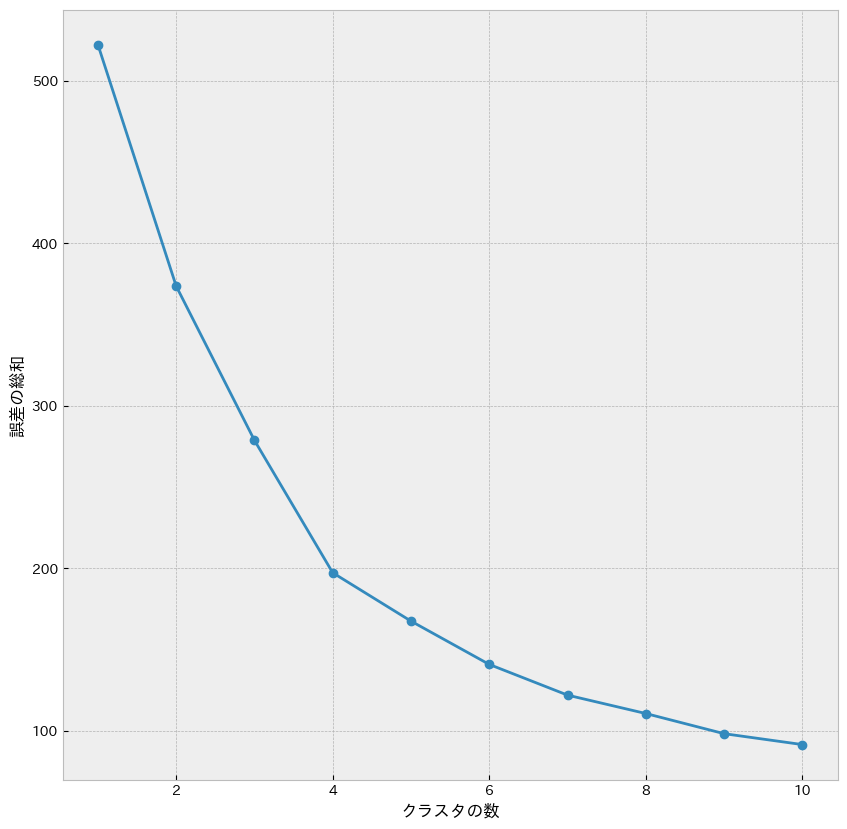

In [41]:
# クラスタ数最適化
distortions = []

for i  in range(1,11):                # 1~10クラスタまで一気に計算
    km = KMeans(n_clusters=i,
                n_init=10,
                random_state=0)
    km.fit(x)                         # クラスタリングの計算を実行
    distortions.append(km.inertia_)   # km.fitするとkm.inertia_が得られる

plt.plot(range(1,11),distortions,marker='o')
plt.xlabel('クラスタの数')
plt.ylabel('誤差の総和')
plt.show()

クラスタリングと主成分分析

In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
pca = PCA(n_components=2, random_state=0)

In [43]:
# データの標準化
x_scaled = scaler.fit_transform(x)

# 主成分分析の実行
feature = pca.fit_transform(x_scaled)

In [44]:
new_df = df.copy()
new_df.head(2)

,現代文,古文,数学,化学,生物,物理,歴史,世界史,政治経済,英語,cluster
0,2,3,4,3,3,4,3,2,3,2,2
1,5,4,3,3,3,2,4,3,4,5,1


In [45]:
# 主成分負荷量の追加
new_df[['PC1', 'PC2']] = feature
new_df.head()

,現代文,古文,数学,化学,生物,物理,歴史,世界史,政治経済,英語,cluster,PC1,PC2
0,2,3,4,3,3,4,3,2,3,2,2,1.582937,1.522060
1,5,4,3,3,3,2,4,3,4,5,1,-0.537827,-1.654101
2,3,3,3,4,3,4,3,4,4,3,2,0.107779,0.336046
3,5,5,3,3,3,3,4,4,4,5,1,-1.339368,-1.645856
4,4,3,4,5,4,3,3,3,4,3,2,-0.518339,0.969427


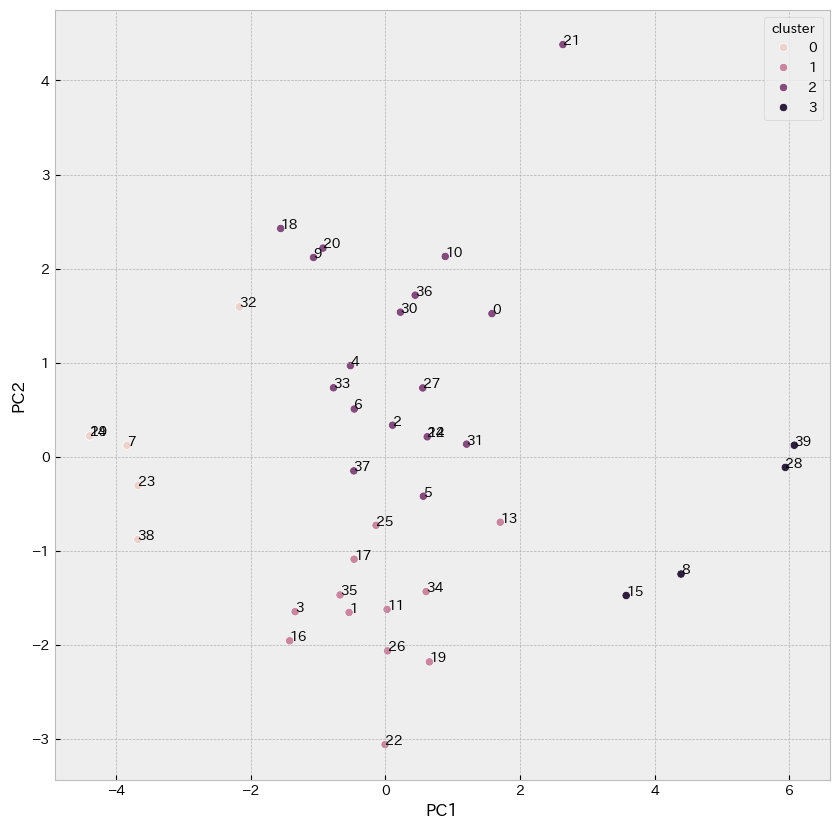

In [46]:
# 散布図を可視化
plt.figure(figsize=(10, 10))

for x, y, name in zip(new_df['PC1'], new_df['PC2'], list(range(len(new_df)))):
    plt.text(x, y, name)

sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=new_df);